

# **Naive_Bayes_Implementation** 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')

**Dropping rows with null value**

In [7]:
train.dropna(inplace=True)

In [8]:
test.dropna(inplace = True)


Train-Validation Split

In [9]:
train_size = int(0.8 * len(train))

train_set = train.iloc[:train_size , : ]
val_set = train.iloc[train_size: , : ]

Defining X_train , X_val , y_train and y_val

In [10]:
X_train = train_set.drop(['Survived'],axis = 1)
X_val = val_set.drop(["Survived"],axis = 1)
y_train = train_set["Survived"]
y_val = val_set["Survived"]

# **Code for implementation of NaiveBayes algorithm**

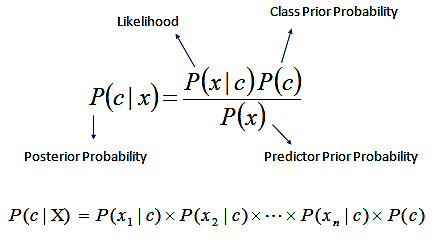

In [11]:
class NaiveBayesClassifier():
    
    # Bayes Theorem : P(y|X) = P(X|y) * P(y) / P(X)
    
    def calc_prior(self, features, target):
        
        # prior probability P(y)
        # calculate prior probabilities        
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()
        return self.prior
    
    def calc_statistics(self, features, target):
        
        #calculate mean, variance for each column and convert to numpy array         
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        
        #calculate probability from gaussian density function (normally distributed)        
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        

        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i])                                 ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x)))     # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     
        # function for model training
    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
        # function to predict outputs for new datapoints
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds


In [ ]:
nbc = NaiveBayesClassifier()    # object of class NaiveBayesClassifier
nbc.fit(X_train, y_train)       # Fitting the train data

In [13]:
y_preds = nbc.predict(X_val)    # Predicting for validation set

Function to calculate accuracy

In [14]:
def accuracy(y_true,y_pred,normalize=True):
    accuracy=[]
    for i in range(len(y_pred)):
        if y_pred[i]==y_true[i]:
            accuracy.append(1)
        else:
            accuracy.append(0)
    if normalize==True:
        return np.mean(accuracy)
    if normalize==False:
        return sum(accuracy)

In [15]:
print("Accuracy : {} %".format(round(accuracy(np.array(y_val) , y_preds )*100,2)))

Accuracy : 82.02 %
